In [1]:
# Kernel_Support_Vector_Machine.ipynb


In [100]:
%matplotlib notebook
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [101]:
df1 = pd.read_excel('train.xlsx')

In [102]:
df2 = pd.read_excel('test.xlsx')

In [103]:
df1 = df1.dropna()

In [104]:
df2 = df2.dropna()

In [105]:
df1

,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_oct
0,1,1500,2,1,2,23,0,0,0,2,...,1463,938.0,698.0,75,150,86,0,50.0,50.0,yes
1,2,8500,2,2,2,29,0,0,0,0,...,8364,8275.0,8425.0,300,400,315,300,325.0,305.0,no
2,3,1000,1,1,2,22,0,0,0,0,...,933,772.0,794.0,150,150,150,24,105.0,110.0,no
3,4,10500,1,1,1,31,0,0,0,0,...,7190,7229.0,7340.0,255,260,258,260,265.0,307.0,no
4,5,10500,2,2,1,44,0,0,0,0,...,3558,3592.0,3496.0,180,155,145,130,135.0,200.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23996,12500,2,3,1,50,-2,-2,-2,-2,...,0,1980.0,1019.0,408,0,0,1981,1019.0,1635.0,no
23996,23997,1500,2,2,2,27,2,-1,0,0,...,73,73.0,1402.0,149,73,0,73,1402.0,55.0,yes
23997,23998,7000,1,2,2,34,0,0,0,0,...,3009,2946.0,2932.0,250,110,115,115,105.0,100.0,no
23998,23999,8000,1,1,2,41,0,0,0,0,...,2503,2457.0,2616.0,100,100,300,0,210.0,100.0,no


In [108]:
df1.groupby(['default_oct']).count()

,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
default_oct,,,,,,,,,,,,,,,,,,,,,
no,17745,17745,17745,17745,17745,17745,17745,17745,17745,17745,...,17745,17745,17745,17745,17745,17745,17745,17745,17745,17745
yes,5045,5045,5045,5045,5045,5045,5045,5045,5045,5045,...,5045,5045,5045,5045,5045,5045,5045,5045,5045,5045


In [109]:
X_Independent = df1.iloc[:,1:-1]
X_Independent

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,1500,2,1,2,23,0,0,0,2,2.0,...,1482,1463,938.0,698.0,75,150,86,0,50.0,50.0
1,8500,2,2,2,29,0,0,0,0,0.0,...,8300,8364,8275.0,8425.0,300,400,315,300,325.0,305.0
2,1000,1,1,2,22,0,0,0,0,0.0,...,896,933,772.0,794.0,150,150,150,24,105.0,110.0
3,10500,1,1,1,31,0,0,0,0,0.0,...,7077,7190,7229.0,7340.0,255,260,258,260,265.0,307.0
4,10500,2,2,1,44,0,0,0,0,0.0,...,3533,3558,3592.0,3496.0,180,155,145,130,135.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,12500,2,3,1,50,-2,-2,-2,-2,-2.0,...,0,0,1980.0,1019.0,408,0,0,1981,1019.0,1635.0
23996,1500,2,2,2,27,2,-1,0,0,-1.0,...,147,73,73.0,1402.0,149,73,0,73,1402.0,55.0
23997,7000,1,2,2,34,0,0,0,0,0.0,...,3146,3009,2946.0,2932.0,250,110,115,115,105.0,100.0
23998,8000,1,1,2,41,0,0,0,0,2.0,...,2242,2503,2457.0,2616.0,100,100,300,0,210.0,100.0


In [110]:
y_dependent = df1.iloc[:,-1]
y_dependent


0        yes
1         no
2         no
3         no
4         no
        ... 
23995     no
23996    yes
23997     no
23998     no
23999    yes
Name: default_oct, Length: 22790, dtype: object

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    X_Independent, y_dependent, test_size = 0.2, random_state = 0)

In [127]:
y_train




16204     no
10151     no
645      yes
9649     yes
21883    yes
        ... 
13812    yes
20692    yes
10361     no
11363     no
2861      no
Name: default_oct, Length: 18232, dtype: object

In [128]:
y_test

13082     no
8333     yes
19146     no
6343      no
12114     no
        ... 
18915     no
8660      no
19657    yes
9641      no
10595     no
Name: default_oct, Length: 4558, dtype: object

In [129]:
# Training Data Normalisation

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled



array([[1.51515152e-01, 1.00000000e+00, 1.66666667e-01, ...,
        1.63929147e-02, 7.03366782e-04, 0.00000000e+00],
       [2.72727273e-01, 0.00000000e+00, 1.66666667e-01, ...,
        4.25120773e-03, 6.18962768e-03, 1.55109144e-03],
       [2.02020202e-02, 1.00000000e+00, 1.66666667e-01, ...,
        1.80354267e-03, 4.22020069e-03, 2.26988991e-03],
       ...,
       [2.32323232e-01, 0.00000000e+00, 1.66666667e-01, ...,
        1.52334944e-02, 3.28237832e-03, 3.11542390e-01],
       [1.21212121e-01, 0.00000000e+00, 3.33333333e-01, ...,
        2.38325282e-03, 3.46994279e-03, 2.79953089e-03],
       [9.09090909e-02, 0.00000000e+00, 5.00000000e-01, ...,
        4.79871176e-03, 7.03366782e-03, 1.15386070e-02]])

In [130]:
np.shape(X_train_scaled)

(18232, 23)

In [138]:
# SMOTE (Synthetic Minority Ovrsampling Technique)

smote = SMOTE(sampling_strategy ='minority')
X_sm, y_sm = smote.fit_sample(X_train_scaled,y_train)


In [139]:
y_sm.groupby(y_sm).count()

default_oct
no     14154
yes    14154
Name: default_oct, dtype: int64

In [140]:
clf = SVC(kernel = 'rbf')
tuned_parameters = {'gamma':[0.001,0.1,1,10,15], 'C':[0.1,1,15,20]}

In [146]:
grid_clf_acc = GridSearchCV(clf, param_grid = tuned_parameters, cv = 10)
grid_clf_acc.fit(X_sm, y_sm)
print('Grid Best Parameter (max.accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy):', grid_clf_acc.best_score_)

Grid Best Parameter (max.accuracy):  {'C': 20, 'gamma': 15}
Grid best score (accuracy): 0.8134100999409615


In [96]:
X_test = df2[]


,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,24002,10500,1,2,2,34,0,0,0,0,...,2080,1741,881.0,120.0,99,1053,724,884,120.0,24.0
1,24003,27500,2,5,2,52,-2,-2,-2,-2,...,12816,987,23.0,409.0,300,300,987,23,409.0,0.0
2,24004,27500,2,2,1,32,2,0,0,0,...,26775,27401,26533.0,7754.0,1054,1143,8381,700,215.0,7903.0
3,24005,9000,2,2,1,32,1,2,2,2,...,887,858,936.0,1169.0,0,150,0,100,250.0,100.0
4,24006,500,1,3,2,42,1,2,2,2,...,431,294,220.0,259.0,0,129,0,50,50.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,29996,17500,1,1,1,42,2,-1,-1,-1,...,33,33,33.0,1536.0,33,33,33,33,1536.0,41.0
5995,29997,10000,2,2,1,28,0,0,0,0,...,422,4852,5177.0,181.0,250,100,4450,325,4.0,75.0
5996,29998,3000,2,2,1,29,0,0,0,0,...,2856,2551,1210.0,264.0,109,114,71,8,21.0,1467.0
5997,29999,1500,1,3,2,37,1,2,2,0,...,1186,1231,1246.0,1263.0,69,0,84,50,75.0,25.0


In [147]:
# test data normalisation first 

X_test_scaled = scaler.fit_transform(X_test)


In [149]:
# GridSearch Tuned SVM Implementation

SVM_predicted = SVC(gamma = 15, C = 20, probability = True, random_state= 0).fit(X_train_scaled, y_train)
SVM_predicted_score = SVM_predicted.score(X_test_scaled, y_test)
print('Accuracy score on Testing Data', SVM_predicted_score)

Accuracy score on Testing Data 0.7270732777534006


In [156]:
# ROC AUC Score

y_score_SVM = SVC(gamma = 20, C=20,probability = True ).fit(X_train_scaled, y_train).decision_function(X_test_scaled)
fpr,tpr, _ = roc_curve(y_test,y_score_SVM)
roc_auc_SVM = auc(fpr,tpr)

In [157]:
roc_auc_SVM


0.6169399138429782

<IPython.core.display.Javascript object>


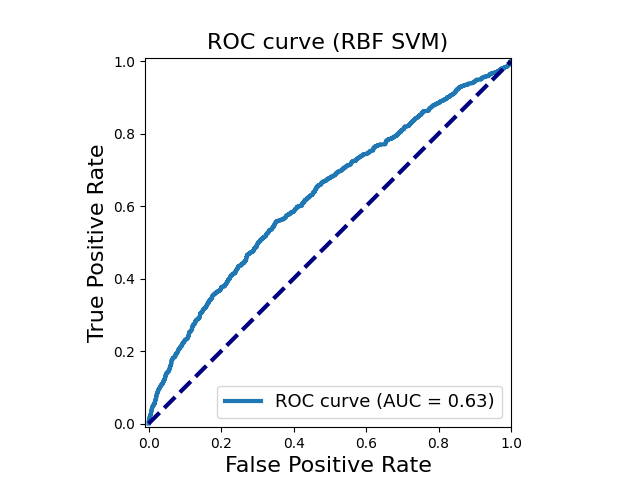

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


In [152]:
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='ROC curve (AUC = {:0.2f})'.format(roc_auc_SVM))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (RBF SVM)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()